In [1]:
#necessary libraries to imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#data loading
df = pd.read_csv('Zecon_Data.csv')
display(df.head())  # to show first few rows

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,108700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,aberdeenbinghamid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,168400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,aberdeenharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81300.0,137900.0,109600.0,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,aberdeenmoorenc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,131100.0,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762566 entries, 0 to 3762565
Data columns (total 81 columns):
 #   Column                                                         Dtype  
---  ------                                                         -----  
 0   Date                                                           object 
 1   RegionName                                                     object 
 2   InventorySeasonallyAdjusted_AllHomes                           float64
 3   InventoryRaw_AllHomes                                          float64
 4   MedianListingPricePerSqft_1Bedroom                             float64
 5   MedianListingPricePerSqft_2Bedroom                             float64
 6   MedianListingPricePerSqft_3Bedroom                             float64
 7   MedianListingPricePerSqft_4Bedroom                             float64
 8   MedianListingPricePerSqft_5BedroomOrMore                       float64
 9   MedianListingPricePerSqft_AllHomes            

In [4]:
#checking any missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Date                                          0
RegionName                                    0
InventorySeasonallyAdjusted_AllHomes    2990822
InventoryRaw_AllHomes                   2990822
MedianListingPricePerSqft_1Bedroom      3754896
                                         ...   
ZRI_AllHomes                            2664399
ZRI_AllHomesPlusMultifamily             2661716
ZriPerSqft_AllHomes                     2753169
Zri_MultiFamilyResidenceRental          3312347
Zri_SingleFamilyResidenceRental         2663647
Length: 81, dtype: int64


In [5]:
#data cleaning
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print("Missing values after cleaning:", df.isnull().sum().sum())

Missing values after cleaning: 0


In [6]:
#removing outliers for ZHVI_AllHomes
zhvi_mean = df['ZHVI_AllHomes'].mean()
zhvi_std = df['ZHVI_AllHomes'].std()
df = df[(df['ZHVI_AllHomes'] > zhvi_mean - 3*zhvi_std) & 
        (df['ZHVI_AllHomes'] < zhvi_mean + 3*zhvi_std)]
print("after outlier removal:", df.shape)

after outlier removal: (3704459, 81)


In [7]:
#saving cleaned dataset
df.to_csv('Cleaned_Zecon_Data.csv', index=False)
print("saved Cleaned_Zecon_Data.csv")

saved Cleaned_Zecon_Data.csv


Feature selection process:

In [8]:
print(list(df.columns)) #available features in the dataset

['Date', 'RegionName', 'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes', 'MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom', 'MedianListingPricePerSqft_3Bedroom', 'MedianListingPricePerSqft_4Bedroom', 'MedianListingPricePerSqft_5BedroomOrMore', 'MedianListingPricePerSqft_AllHomes', 'MedianListingPricePerSqft_CondoCoop', 'MedianListingPricePerSqft_DuplexTriplex', 'MedianListingPricePerSqft_SingleFamilyResidence', 'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom', 'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom', 'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes', 'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex', 'MedianListingPrice_SingleFamilyResidence', 'MedianPctOfPriceReduction_AllHomes', 'MedianPctOfPriceReduction_CondoCoop', 'MedianPctOfPriceReduction_SingleFamilyResidence', 'MedianPriceCutDollar_AllHomes', 'MedianPriceCutDollar_CondoCoop', 'MedianPriceCutDollar_SingleFamilyResidence', 

In [9]:
features = [
    'MedianListingPrice_AllHomes',
    'ZHVI_3bedroom', 
    'PriceToRentRatio_AllHomes'
]
target = 'ZHVI_AllHomes'
X = df[features]
y = df[target]

In [10]:
# splitting formula for data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#(80% training, 20% testing)

In [11]:
#Linear Regression
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train, y_train)
y_pred = Linear_Regression.predict(X_test)

In [12]:
#calculating metrics linear regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nLinear Regression:")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")

print("\nImpact on ZHVI:")
for feature, coef in zip(features, Linear_Regression.coef_):
    print(f"{feature}: ${coef:.2f} per unit")


Linear Regression:
Mean Absolute Error: $34626.08
Root Mean Squared Error: $61797.47

Impact on ZHVI:
MedianListingPrice_AllHomes: $0.06 per unit
ZHVI_3bedroom: $0.73 per unit
PriceToRentRatio_AllHomes: $12181.87 per unit


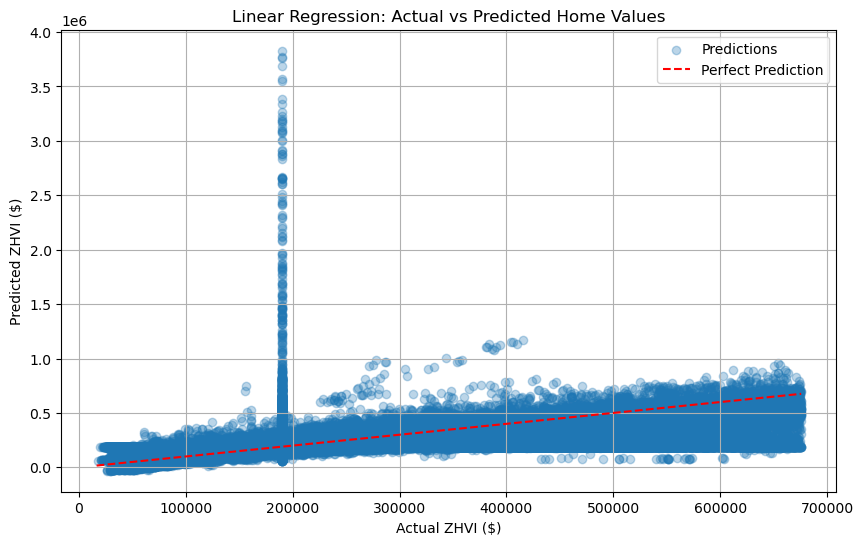

In [13]:
#scatter plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual ZHVI ($)")
plt.ylabel("Predicted ZHVI ($)")
plt.title("Linear Regression: Actual vs Predicted Home Values")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
#random forest modeling
Random_Forest = RandomForestRegressor(random_state=42)
Random_Forest.fit(X_train, y_train)
Random_Forest_y_pred = Random_Forest.predict(X_test)

In [15]:
#calculating metrics for random forest
Random_Forest_mae = mean_absolute_error(y_test, Random_Forest_y_pred)
Random_Forest_mse = mean_squared_error(y_test, Random_Forest_y_pred)
Random_Forest_rmse = np.sqrt(Random_Forest_mse)

print("\nRandom Forest:")
print(f"Mean Absolute Error: ${Random_Forest_mae:.2f}") 
print(f"Root Mean Squared Error: ${Random_Forest_rmse:.2f}")


Random Forest:
Mean Absolute Error: $27863.94
Root Mean Squared Error: $49668.51


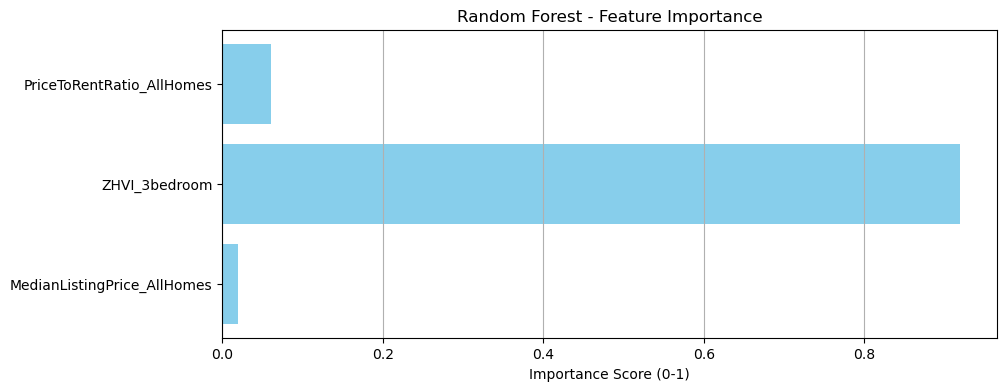

In [16]:
#feature importance plotting
importances = Random_Forest.feature_importances_
plt.figure(figsize=(10, 4))
plt.barh(features, importances, color='skyblue')
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance Score (0-1)")
plt.grid(axis='x')
plt.show()

In [17]:
#prediction results
results = X_test.copy()
results['Actual_ZHVI'] = y_test
results['Predicted_ZHVI'] = y_pred
results.to_csv('Prediction_Results.csv', index=False)
print("saved Prediction_Results.csv")

saved Prediction_Results.csv
